In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import minimize
from datetime import datetime

In [2]:
# Define the market symbol (e.g., S&P 500 ETF)
market_symbol = '^GSPC'  # S&P 500 index

In [3]:
# Define the symbols for the stocks
symbols = ["MSFT", "GOOGL", "AAPL", "META", "AMZN", "TSLA"]

In [7]:
# Define the date range
start_date = "2015-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')  # Use the current date or your desired end date

In [8]:
# Fetch data
data = yf.download(symbols + [market_symbol], start=start_date, end=end_date)['Close']
data.columns = symbols + [market_symbol]

[*********************100%***********************]  7 of 7 completed


In [9]:
# Combine the data into a single DataFram
data1 = pd.DataFrame(data)

In [10]:
df = data1[["MSFT", "GOOGL", "AAPL", "META", "AMZN", "TSLA"]]

In [11]:
df.head(5)

,MSFT,GOOGL,AAPL,META,AMZN,TSLA
Date,,,,,,
2015-01-02,27.332500,15.4260,26.477501,78.449997,46.759998,14.620667
2015-01-05,26.562500,15.1095,25.973000,77.190002,46.330002,14.006000
2015-01-06,26.565001,14.7645,25.332001,76.150002,45.650002,14.085333
2015-01-07,26.937500,14.9210,25.257500,76.150002,46.230000,14.063333
2015-01-08,27.972500,15.0230,25.345501,78.180000,47.590000,14.041333


In [12]:
df.to_excel('assets.xlsx')

In [13]:
#The data shape
df.shape

(2193, 6)

In [14]:
df.describe()

,MSFT,GOOGL,AAPL,META,AMZN,TSLA
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,80.811186,90.430794,71.736757,186.015664,155.671222,98.481851
std,53.935406,48.653020,34.716109,73.676356,95.692223,109.895838
min,22.584999,14.347500,24.853001,74.050003,40.290001,9.578000
25%,34.799999,42.493999,42.445499,128.770004,64.720001,16.559999
50%,52.107498,89.460503,59.224998,174.940002,126.160004,22.862667
75%,135.270004,129.330002,100.797501,221.820007,244.490005,202.070007
max,196.449997,186.570496,149.838501,382.179993,359.489990,409.970001


In [15]:
#checking for missing values
df.isnull().sum()

MSFT     0
GOOGL    0
AAPL     0
META     0
AMZN     0
TSLA     0
dtype: int64

In [16]:
#check the data types
df.dtypes

MSFT     float64
GOOGL    float64
AAPL     float64
META     float64
AMZN     float64
TSLA     float64
dtype: object

<Figure size 1200x1200 with 0 Axes>

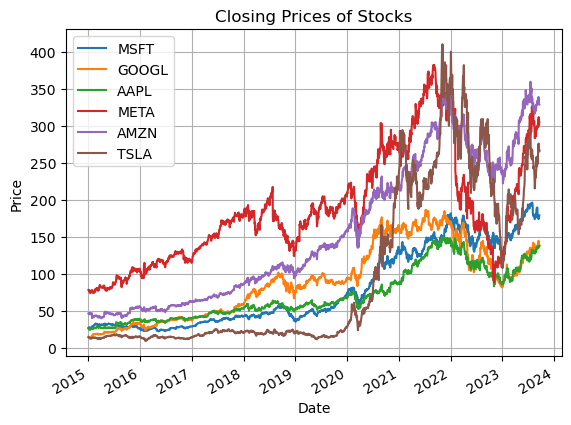

In [19]:
# Plot the dataset
plt.figure(figsize=(12, 12))
df.plot()
plt.title('Closing Prices of Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(symbols)
plt.grid()
plt.show()

In [20]:
weights = [0.2, 0.2, 0.15, 0.15, 0.15, 0.15]  # Example weights, should sum up to 1

In [21]:
df.columns = symbols

In [22]:
# Calculate portfolio prices
portfolio_prices = (df * weights).sum(axis=1)

In [23]:
# Append portfolio prices to the dataframe
df['Portfolio'] = portfolio_prices

In [24]:
df.head()

,MSFT,GOOGL,AAPL,META,AMZN,TSLA,Portfolio
Date,,,,,,,
2015-01-02,27.332500,15.4260,26.477501,78.449997,46.759998,14.620667,33.497925
2015-01-05,26.562500,15.1095,25.973000,77.190002,46.330002,14.006000,32.859250
2015-01-06,26.565001,14.7645,25.332001,76.150002,45.650002,14.085333,32.448501
2015-01-07,26.937500,14.9210,25.257500,76.150002,46.230000,14.063333,32.626825
2015-01-08,27.972500,15.0230,25.345501,78.180000,47.590000,14.041333,33.372625


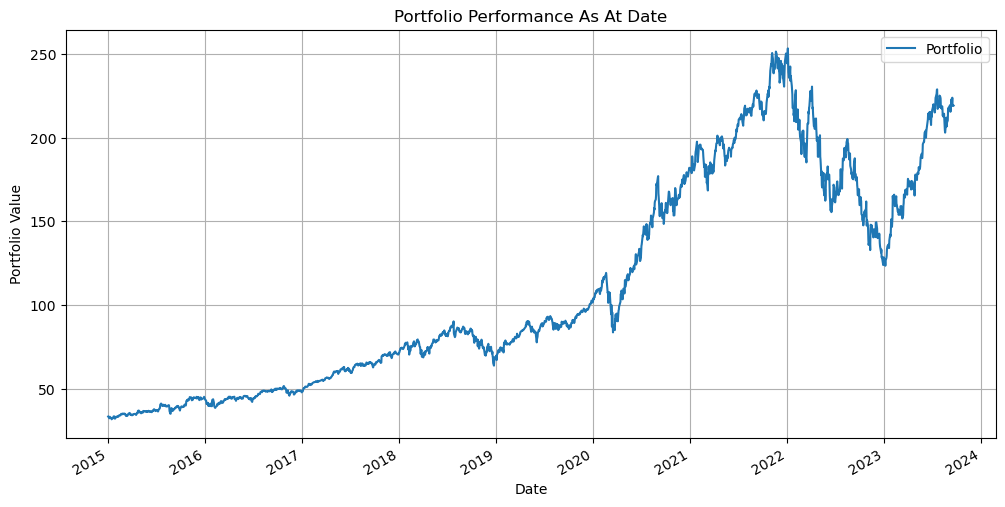

In [25]:
# Plot portfolio performance
plt.figure(figsize=(12, 6))
df['Portfolio'].plot(label='Portfolio')
plt.title('Portfolio Performance As At Date')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

### Returns on Investment

In [26]:
# Calculate daily returns
portfolio_returns = df.pct_change().dropna()

#portfolio_prices = (df[symbols] * weights).sum(axis=1)
portfolio_returns #= portfolio_prices.pct_change().dropna()

,MSFT,GOOGL,AAPL,META,AMZN,TSLA,Portfolio
Date,,,,,,,
2015-01-05,-0.028172,-0.020517,-0.019054,-0.016061,-0.009196,-0.042041,-0.019066
2015-01-06,0.000094,-0.022833,-0.024679,-0.013473,-0.014677,0.005664,-0.012500
2015-01-07,0.014022,0.010600,-0.002941,0.000000,0.012705,-0.001562,0.005496
2015-01-08,0.038422,0.006836,0.003484,0.026658,0.029418,-0.001564,0.022858
2015-01-09,0.001073,-0.011749,-0.012211,-0.005628,-0.008405,-0.018802,-0.007231
...,...,...,...,...,...,...,...
2023-09-13,-0.011855,0.025632,0.010123,0.011271,0.012931,0.014281,0.010222
2023-09-14,0.008782,-0.000898,0.010168,0.021832,0.007856,0.017472,0.011730
2023-09-15,-0.004154,-0.029920,-0.005069,-0.036603,-0.025037,-0.005977,-0.019430


In [27]:
# Calculate cumulative returns for Total Return
cumulative_returns = (1 + portfolio_returns).cumprod()

In [28]:
cumulative_returns

,MSFT,GOOGL,AAPL,META,AMZN,TSLA,Portfolio
Date,,,,,,,
2015-01-05,0.971828,0.979483,0.980946,0.983939,0.990804,0.957959,0.980934
2015-01-06,0.971920,0.957118,0.956737,0.970682,0.976262,0.963385,0.968672
2015-01-07,0.985548,0.967263,0.953923,0.970682,0.988666,0.961880,0.973995
2015-01-08,1.023415,0.973875,0.957247,0.996558,1.017750,0.960376,0.996259
2015-01-09,1.024513,0.962434,0.945557,0.990950,1.009196,0.942319,0.989055
...,...,...,...,...,...,...,...
2023-09-13,6.373731,9.389992,5.163252,3.888592,7.186912,18.555924,6.602842
2023-09-14,6.429708,9.381564,5.215749,3.973486,7.243371,18.880124,6.680295
2023-09-15,6.403000,9.100869,5.189311,3.828043,7.062019,18.767270,6.550495


In [40]:
cumulative_returns.describe()

,MSFT,GOOGL,AAPL,META,AMZN,TSLA,Portfolio
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,2.957489,5.864451,2.710128,2.371762,3.330216,6.738414,3.315716
std,1.973314,3.152970,1.310945,0.938908,2.046317,7.517188,1.900258
min,0.826306,0.930086,0.938646,0.943913,0.861634,0.655100,0.950470
25%,1.274170,2.756207,1.603319,1.642479,1.384249,1.132746,1.635246
50%,1.906659,5.799478,2.238674,2.230019,2.698247,1.563745,2.573785
75%,4.949785,8.386328,3.807785,2.827820,5.228615,13.822158,5.074058
max,7.187414,12.094548,5.659088,4.871638,7.687981,28.040444,7.559099


In [41]:
df2 = cumulative_returns[['MSFT','GOOGL','AAPL','META','AMZN','TSLA']]

<Figure size 1200x600 with 0 Axes>

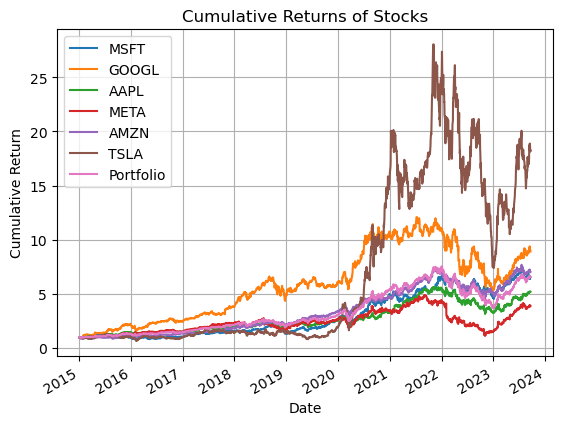

In [42]:
# Plot cumulative returns
plt.figure(figsize=(12, 6))
cumulative_returns.plot()
plt.title('Cumulative Returns of Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
#plt.legend(symbols)
plt.grid()
plt.show()

In [43]:
# Calculate Total Portfolio Return and ROI
start_price = df['Portfolio'].iloc[0]
end_price = df['Portfolio'].iloc[-1]
total_return = (end_price - start_price) / start_price
roi = (end_price / start_price - 1) * 100

In [44]:
# Display Total Return and ROI
roi

554.0076869061777

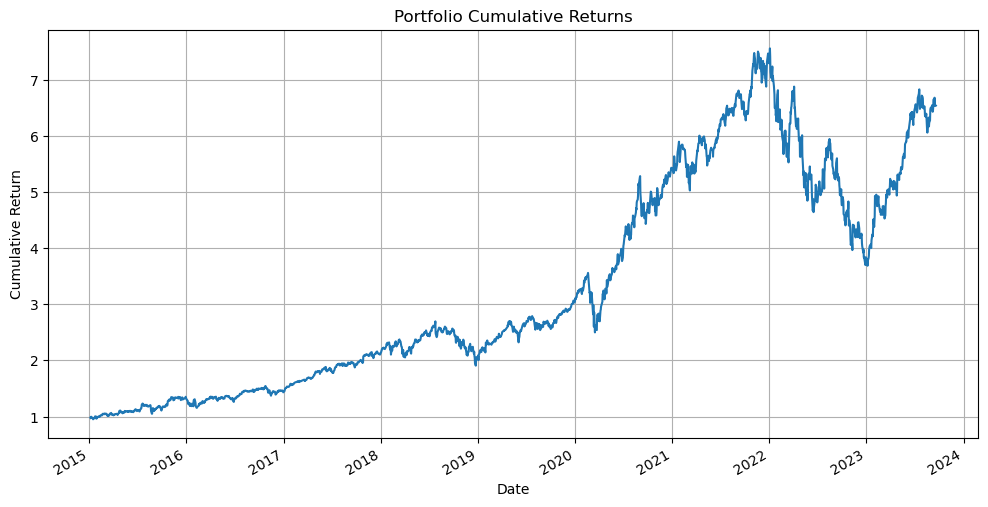

In [45]:
# Plot cumulative returns
plt.figure(figsize=(12, 6))
cumulative_returns['Portfolio'].plot()
plt.title('Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
#plt.legend(symbols)
plt.grid()
plt.show()

In [46]:
# Calculate market returns
market_returns = data1[market_symbol].pct_change().dropna()

### Risk Metrics

In [47]:
# Calculate Standard Deviation
std_deviation = df['Portfolio'].std()

In [48]:
std_deviation

63.66171684657743

In [49]:
# Plot rolling risk
plt.figure(figsize=(12, 12))
rolling_risk.plot(title='Rolling Portfolio Risk (30-day window)')
plt.xlabel('Date')
plt.ylabel('Rolling Risk (Volatility)')
plt.grid(True)
plt.show()

NameError: name 'rolling_risk' is not defined

<Figure size 1200x1200 with 0 Axes>

### Market Positions

In [494]:
# Fetch market benchmark data (e.g., S&P 500 index)
market_symbol = '^GSPC'
market_data = yf.download(benchmark_symbol, start=start_date, end=end_date)['Close']
market_returns = benchmark_data.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


In [495]:
market_returns = market_data.pct_change().dropna()

In [498]:
portfolio_returns = portfolio_prices.pct_change().dropna()

In [623]:
portfolio = df2.pct_change().dropna()

In [624]:
# Calculate covariance between stock and market returns
covariance = df2.cov(market_returns)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [504]:
# Calculate variance of market returns
market_variance = market_returns.var()

In [505]:
# Calculate beta
stock_beta = covariance / market_variance

In [507]:
print(f"The beta of {symbols} is:", stock_beta)

The beta of ['MSFT', 'GOOGL', 'AAPL', 'META', 'AMZN', 'TSLA'] is: 1.2209693319238926


In [560]:
# Calculate asset betas
asset_betas = []
for symbol in symbols:
    cov_matrix = pd.concat([df, market_returns], axis=1).cov()
    asset_beta = cov_matrix.iloc[0, 1] / cov_matrix.iloc[1, 1]
    asset_betas.append(asset_beta)

In [561]:
# Print calculated asset betas
for symbol, beta in zip(symbols, asset_betas):
    print(f"Asset Beta for {symbol}: {beta}")

Asset Beta for MSFT: 0.914764521419132
Asset Beta for GOOGL: 0.914764521419132
Asset Beta for AAPL: 0.914764521419132
Asset Beta for META: 0.914764521419132
Asset Beta for AMZN: 0.914764521419132
Asset Beta for TSLA: 0.914764521419132


In [562]:
# Create a DataFrame to store asset betas
beta_df = pd.DataFrame(columns=['beta_stock'])

In [564]:
# Calculate asset betas
for symbol in symbols:
    cov_matrix = pd.concat([df, market_returns], axis=1).cov()
    asset_beta = cov_matrix.iloc[0, 1] / cov_matrix.iloc[1, 1]
    beta_df.loc[symbol] = [asset_beta]

In [566]:
# Print calculated asset betas
print("Calculated Asset Betas:")
beta_df

Calculated Asset Betas:


,beta_stock
MSFT,0.914765
GOOGL,0.914765
AAPL,0.914765
META,0.914765
AMZN,0.914765
TSLA,0.914765


### Model Preparation and Training

In [508]:
# Create a lagged version of portfolio returns as features for prediction
lags = 5  # Number of lagged returns as features
for i in range(1, lags + 1):
    portfolio_returns[f'Lag_{i}'] = portfolio_returns.shift(i)

In [509]:
# Prepare data for modeling
X = portfolio.dropna().drop('Portfolio', axis=1)
y = portfolio.dropna()['Portfolio']

In [510]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [511]:
# Initialize models
models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    SVR(kernel='linear'),
    GradientBoostingRegressor(n_estimators=100, random_state=42)
]

In [512]:
# Train and evaluate models
results = {}

for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[model_name] = mse

In [513]:
# Find the best model
best_model = min(results, key=results.get)
print("Best Model:", best_model)

Best Model: LinearRegression


In [514]:
# Plot predicted vs. actual portfolio prices using the best model
best_model_instance = next(model for model in models if model.__class__.__name__ == best_model)
predicted_returns = best_model_instance.predict(X_test)

In [515]:
predicted_prices = [portfolio_prices[X_train.index[-1]]]

In [516]:
for ret in predicted_returns:
    predicted_prices.append(predicted_prices[-1] * (1 + ret))

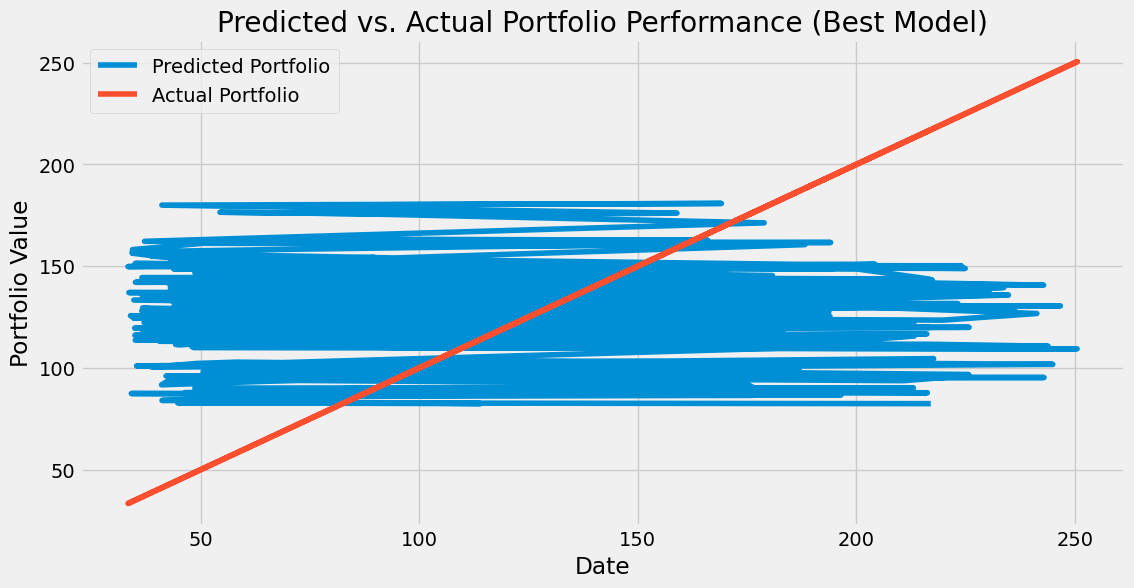

In [517]:
# Plot predicted vs. actual portfolio prices using the best model
plt.figure(figsize=(12, 6))
plt.plot(portfolio_prices[X_test.index], predicted_prices[:-1], label='Predicted Portfolio')  # Remove the last element
plt.plot(portfolio_prices[X_test.index], portfolio_prices[X_test.index], label='Actual Portfolio')
plt.title('Predicted vs. Actual Portfolio Performance (Best Model)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

In [518]:
# Predict expected returns for 1 year
last_observed_returns = X.iloc[-1]
expected_returns_1_year = best_model_instance.predict([last_observed_returns])[0]

C:\Users\Hp 2022\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [519]:
# Convert expected returns to portfolio price change
expected_price_change = portfolio_prices[-1] * (1 + expected_returns_1_year)

In [520]:
expected_price_change

201.6830765514794

In [521]:
# Calculate cumulative returns
cumulative_returns_1_year = np.prod(1 + expected_returns_1_year)

In [522]:
print("Expected Portfolio Price Change in 1 Year:", expected_price_change)

Expected Portfolio Price Change in 1 Year: 201.6830765514794


In [523]:
# Predict expected returns in 5 years
expected_returns_5_years = best_model_instance.predict([last_observed_returns] * 5)[0]
expected_price_change_5_years = portfolio_prices[-1] * (1 + expected_returns_5_years)

C:\Users\Hp 2022\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [524]:
# Predict expected returns in 10 years
expected_returns_10_years = best_model_instance.predict([last_observed_returns] * 10)[0]
expected_price_change_10_years = portfolio_prices[-1] * (1 + expected_returns_10_years)

C:\Users\Hp 2022\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [525]:
print("Expected Portfolio Price Change in 1 Year:", expected_price_change)
print("Expected Portfolio Price Change in 5 Years:", expected_price_change_5_years)
print("Expected Portfolio Price Change in 10 Years:", expected_price_change_10_years)

Expected Portfolio Price Change in 1 Year: 201.6830765514794
Expected Portfolio Price Change in 5 Years: 201.6830765514794
Expected Portfolio Price Change in 10 Years: 201.6830765514794


In [526]:
# Calculate cumulative returns
portfolio_value = portfolio_prices[-1]
cumulative_returns_1_year = portfolio_value * (1 + expected_returns_1_year)
cumulative_returns_5_years = portfolio_value * (1 + expected_returns_5_years) ** 5
cumulative_returns_10_years = portfolio_value * (1 + expected_returns_10_years) ** 10

In [527]:
print("Expected Cumulative Returns in 1 Year:", cumulative_returns_1_year)
print("Expected Cumulative Returns in 5 Years:", cumulative_returns_5_years)
print("Expected Cumulative Returns in 10 Years:", cumulative_returns_10_years)

Expected Cumulative Returns in 1 Year: 201.6830765514794
Expected Cumulative Returns in 5 Years: 196.7172264362708
Expected Cumulative Returns in 10 Years: 190.68150068774128


### Expected Risk Analysis

In [528]:
# Calculate VaR at different confidence levels
confidence_levels = [0.01, 0.05, 0.1]  # Example confidence levels
initial_portfolio_value = portfolio_prices[-1]

In [529]:
for confidence_level in confidence_levels:
    z_score = norm.ppf(1 - confidence_level)
    var_1_year = initial_portfolio_value * expected_returns_1_year * z_score
    var_5_years = initial_portfolio_value * expected_returns_5_years * z_score * 5
    var_10_years = initial_portfolio_value * expected_returns_10_years * z_score * 10

In [530]:
print(f"Expected Portfolio VaR at {confidence_level*100}% confidence in 1 Year:", var_1_year)
print(f"Expected Portfolio VaR at {confidence_level*100}% confidence in 5 Years:", var_5_years)
print(f"Expected Portfolio VaR at {confidence_level*100}% confidence in 10 Years:", var_10_years)

Expected Portfolio VaR at 10.0% confidence in 1 Year: -1.6159431322203843
Expected Portfolio VaR at 10.0% confidence in 5 Years: -8.079715661101922
Expected Portfolio VaR at 10.0% confidence in 10 Years: -16.159431322203844


In [531]:
# Calculate expected ROI
initial_investment = portfolio_prices[-1]
expected_portfolio_value_1_year = initial_investment * (1 + expected_returns_1_year)
expected_portfolio_value_5_years = initial_investment * (1 + expected_returns_5_years) ** 5
expected_portfolio_value_10_years = initial_investment * (1 + expected_returns_10_years) ** 10

In [532]:
roi_1_year = (expected_portfolio_value_1_year - initial_investment) / initial_investment
roi_5_years = (expected_portfolio_value_5_years - initial_investment) / initial_investment
roi_10_years = (expected_portfolio_value_10_years - initial_investment) / initial_investment

In [533]:
print("Expected ROI in 1 Year:", roi_1_year)
print("Expected ROI in 5 Years:", roi_5_years)
print("Expected ROI in 10 Years:", roi_10_years)

Expected ROI in 1 Year: -0.006213177541788025
Expected ROI in 5 Years: -0.030682243024023614
Expected ROI in 10 Years: -0.060423086011061916


In [534]:
# Calculate the expected Sharpe Ratio
risk_free_rate = 0.02  # Example risk-free rate
expected_portfolio_return_1_year = (1 + expected_returns_1_year) - 1
expected_portfolio_return_5_years = (1 + expected_returns_5_years) ** 5 - 1
expected_portfolio_return_10_years = (1 + expected_returns_10_years) ** 10 - 1

In [535]:
# Calculate expected portfolio volatility
historical_volatility = portfolio.std()
expected_volatility_1_year = historical_volatility * np.sqrt(1)
expected_volatility_5_years = historical_volatility * np.sqrt(5)
expected_volatility_10_years = historical_volatility * np.sqrt(10)

In [587]:
# Calculate portfolio standard deviation for each timeframe
portfolio_std_dev_1_year = expected_returns_1_year.std()
portfolio_std_dev_5_years = expected_returns_5_years.std()
portfolio_std_dev_10_years = expected_returns_10_years.std()

### Sharpe Ratio

In [536]:
# Calculate expected Sharpe ratio
risk_free_rate = 0.03  # Example risk-free rate
expected_sharpe_ratio_1_year = (expected_returns_1_year - risk_free_rate) / expected_volatility_1_year
expected_sharpe_ratio_5_years = (expected_returns_5_years - risk_free_rate) / expected_volatility_5_years
expected_sharpe_ratio_10_years = (expected_returns_10_years - risk_free_rate) / expected_volatility_10_years

In [537]:
print("Expected Sharpe Ratio in 1 Year:", expected_sharpe_ratio_1_year['Portfolio'])
print("Expected Sharpe Ratio in 5 Years:", expected_sharpe_ratio_5_years['Portfolio'])
print("Expected Sharpe Ratio in 10 Years:", expected_sharpe_ratio_10_years['Portfolio'])

Expected Sharpe Ratio in 1 Year: -2.0845455317189256
Expected Sharpe Ratio in 5 Years: -0.9322371022233923
Expected Sharpe Ratio in 10 Years: -0.6591911766558574


In [539]:
# Fetch market benchmark data (e.g., S&P 500 index)
#benchmark_symbol = '^GSPC'
#benchmark_data = yf.download(benchmark_symbol, start=start_date, end=end_date)['Close']
#benchmark_returns = benchmark_data.pct_change().dropna()

In [484]:
# Align portfolio returns with market returns for regression
aligned_portfolio_returns = portfolio_returns.iloc[-len(market_returns):]

In [540]:
# Define market risk-free rate and risk premium assumptions
risk_free_rate = 0.03
risk_premium = 0.06  # Assumed excess return above risk-free rate

In [542]:
# Calculate expected market returns for different timeframes
expected_market_return_1_year = risk_free_rate + risk_premium
expected_market_return_5_years = risk_free_rate + risk_premium * 5
expected_market_return_10_years = risk_free_rate + risk_premium * 10

In [572]:
# Define individual asset betas and weights
asset_betas = [0.914765, 0.914765, 0.914765, 0.914765, 0.914765, 0.914765]  # Replace with the actual column name
weights = [0.2, 0.2, 0.15, 0.15, 0.15, 0.15]  # Assuming equal weights for simplicity

In [573]:
# Calculate expected portfolio beta for each timeframe
expected_portfolio_beta_1_year = sum(weight * beta for weight, beta in zip(weights, asset_betas))
expected_portfolio_beta_5_years = expected_portfolio_beta_1_year
expected_portfolio_beta_10_years = expected_portfolio_beta_1_year

In [574]:
# Print the expected portfolio beta for different timeframes
print("Expected Portfolio Beta in 1 Year:", expected_portfolio_beta_1_year)
print("Expected Portfolio Beta in 5 Years:", expected_portfolio_beta_5_years)
print("Expected Portfolio Beta in 10 Years:", expected_portfolio_beta_10_years)

Expected Portfolio Beta in 1 Year: 0.9147650000000003
Expected Portfolio Beta in 5 Years: 0.9147650000000003
Expected Portfolio Beta in 10 Years: 0.9147650000000003


In [575]:
# Calculate expected market returns for different timeframes
expected_market_return_1_year = risk_free_rate + 0.05  # Example expected market return for 1 year
expected_market_return_5_years = risk_free_rate + 0.07  # Example expected market return for 5 years
expected_market_return_10_years = risk_free_rate + 0.08  # Example expected market return for 10 years

In [576]:
# Calculate expected portfolio alpha for each timeframe
expected_portfolio_alpha_1_year = expected_returns_1_year - (risk_free_rate + expected_portfolio_beta_1_year * expected_market_return_1_year)
expected_portfolio_alpha_5_years = expected_returns_5_years - (risk_free_rate + expected_portfolio_beta_5_years * expected_market_return_5_years)
expected_portfolio_alpha_10_years = expected_returns_10_years - (risk_free_rate + expected_portfolio_beta_10_years * expected_market_return_10_years)

In [577]:
# Print the expected portfolio alpha for different timeframes
print("Expected Portfolio Alpha in 1 Year:", expected_portfolio_alpha_1_year)
print("Expected Portfolio Alpha in 5 Years:", expected_portfolio_alpha_5_years)
print("Expected Portfolio Alpha in 10 Years:", expected_portfolio_alpha_10_years)

Expected Portfolio Alpha in 1 Year: -0.10939437754178796
Expected Portfolio Alpha in 5 Years: -0.12768967754178798
Expected Portfolio Alpha in 10 Years: -0.13683732754178798


### Optimized Portfolio Allocations

In [619]:
# Define the objective function for Mean-Variance Optimization
def objective(weights):
    portfolio_return = np.sum(df2 * weights)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -df2 / portfolio_stddev  # Minimize the negative Sharpe ratio

In [620]:
# Define constraints: weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

In [621]:
# Perform optimization for each timeframe
optimized_weights_1_year = minimize(objective, weights, method='SLSQP', constraints=constraints).x

ValueError: shapes (8,8) and (6,) not aligned: 8 (dim 1) != 6 (dim 0)

### Treynor Ratio

In [591]:
# Calculate expected portfolio Treynor Ratio for each timeframe
expected_portfolio_treynor_ratio_1_year = (expected_returns_1_year - risk_free_rate) / expected_portfolio_beta_1_year
expected_portfolio_treynor_ratio_5_years = (expected_returns_5_years - risk_free_rate) / expected_portfolio_beta_5_years
expected_portfolio_treynor_ratio_10_years = (expected_returns_10_years - risk_free_rate) / expected_portfolio_beta_10_years

In [592]:
# Print the expected portfolio Treynor Ratio for different timeframes
print("Expected Portfolio Treynor Ratio in 1 Year:", expected_portfolio_treynor_ratio_1_year)
print("Expected Portfolio Treynor Ratio in 5 Years:", expected_portfolio_treynor_ratio_5_years)
print("Expected Portfolio Treynor Ratio in 10 Years:", expected_portfolio_treynor_ratio_10_years)

Expected Portfolio Treynor Ratio in 1 Year: -0.03958741047349639
Expected Portfolio Treynor Ratio in 5 Years: -0.03958741047349639
Expected Portfolio Treynor Ratio in 10 Years: -0.03958741047349639


### Drawdown

In [594]:
# Calculate the cumulative returns for each timeframe
cumulative_returns_1_year = np.cumprod(1 + expected_returns_1_year) - 1
cumulative_returns_5_years = np.cumprod(1 + expected_returns_5_years) - 1
cumulative_returns_10_years = np.cumprod(1 + expected_returns_10_years) - 1

In [595]:
# Calculate the peak cumulative returns and drawdowns for each timeframe
peak_returns_1_year = np.maximum.accumulate(cumulative_returns_1_year)
drawdown_1_year = (cumulative_returns_1_year - peak_returns_1_year) / peak_returns_1_year

peak_returns_5_years = np.maximum.accumulate(cumulative_returns_5_years)
drawdown_5_years = (cumulative_returns_5_years - peak_returns_5_years) / peak_returns_5_years

peak_returns_10_years = np.maximum.accumulate(cumulative_returns_10_years)
drawdown_10_years = (cumulative_returns_10_years - peak_returns_10_years) / peak_returns_10_years

In [596]:
# Calculate the maximum drawdown for each timeframe
max_drawdown_1_year = np.min(drawdown_1_year)
max_drawdown_5_years = np.min(drawdown_5_years)
max_drawdown_10_years = np.min(drawdown_10_years)

In [597]:
# Print the expected portfolio maximum drawdown for different timeframes
print("Expected Portfolio Max Drawdown in 1 Year:", max_drawdown_1_year)
print("Expected Portfolio Max Drawdown in 5 Years:", max_drawdown_5_years)
print("Expected Portfolio Max Drawdown in 10 Years:", max_drawdown_10_years)

Expected Portfolio Max Drawdown in 1 Year: -0.0
Expected Portfolio Max Drawdown in 5 Years: -0.0
Expected Portfolio Max Drawdown in 10 Years: -0.0


In [234]:
# Create a DataFrame for portfolio metrics
portfolio_metrics = pd.DataFrame({
    'Portfolio Standard Deviation': [portfolio_std_dev],
    'Portfolio Beta': [portfolio_beta],
    'Portfolio VaR': [portfolio_var],
    'Diversification Ratio': [diversification_ratio]
})

In [235]:
# Print the DataFrame
print("Portfolio Metrics:")
print(portfolio_metrics)

# Print the Correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Print the Covariance matrix
print("\nCovariance Matrix:")
print(covariance_matrix)

Portfolio Metrics:
   Portfolio Standard Deviation  Portfolio Beta  Portfolio VaR  \
0                     57.609383    2.434018e+07      19.715386   

   Diversification Ratio  
0               0.188902  

Correlation Matrix:
           AAPL      AMZN     GOOGL      META      MSFT
AAPL   1.000000  0.834289  0.950917  0.701648  0.982679
AMZN   0.834289  1.000000  0.884359  0.893926  0.887080
GOOGL  0.950917  0.884359  1.000000  0.808343  0.971186
META   0.701648  0.893926  0.808343  1.000000  0.774777
MSFT   0.982679  0.887080  0.971186  0.774777  1.000000

Covariance Matrix:
              AAPL         AMZN        GOOGL         META         MSFT
AAPL   2874.065163  2176.802208  1746.058427  2749.607970  5022.806991
AMZN   2176.802208  2368.691844  1474.181354  3180.233952  4116.265691
GOOGL  1746.058427  1474.181354  1173.101905  2023.798075  3171.442361
META   2749.607970  3180.233952  2023.798075  5343.265168  5399.659141
MSFT   5022.806991  4116.265691  3171.442361  5399.659141  909

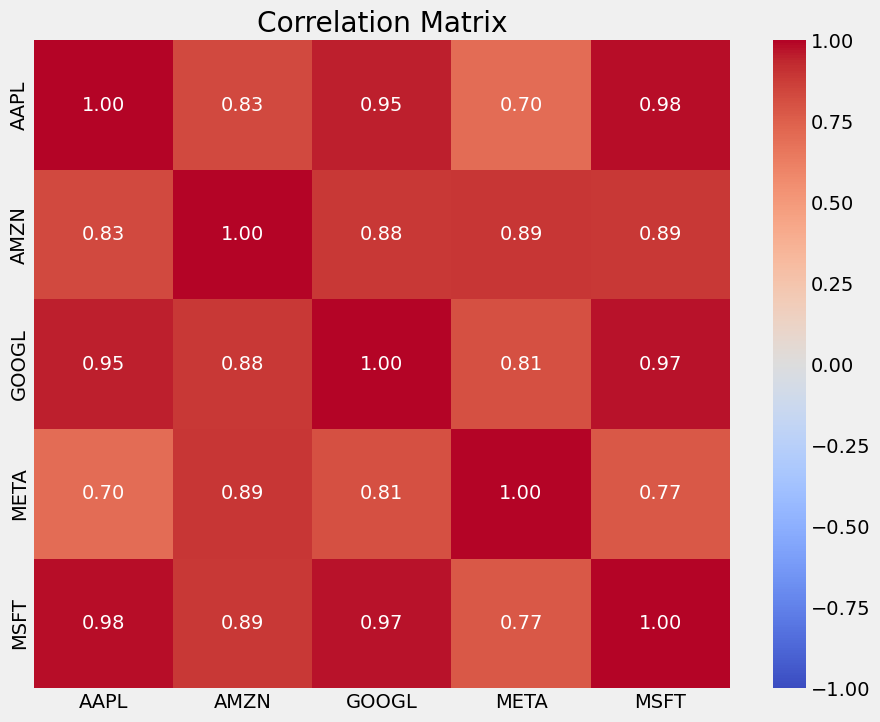

In [238]:
# Plot Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

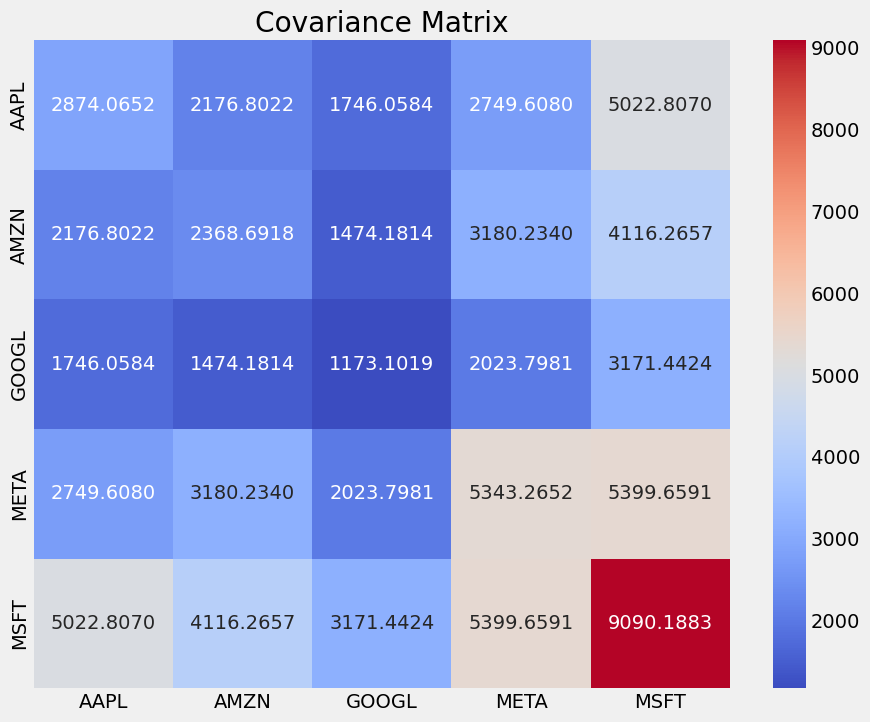

In [239]:
# Plot Covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Covariance Matrix')
plt.show()

### Portfolio Return - Risk Metrics

In [240]:
# Calculate Sharpe Ratio
risk_free_rate = 0.02  # Replace with the appropriate risk-free rate
portfolio_sharpe_ratio = (portfolio_returns.mean() - risk_free_rate) / portfolio_std_dev

In [242]:
# Calculate Treynor Ratio
portfolio_treynor_ratio = (portfolio_returns.mean() - risk_free_rate) / portfolio_beta

In [244]:
# Create a DataFrame for portfolio metrics
portfolio_metrics2 = pd.DataFrame({
    'Portfolio Standard Deviation': [portfolio_std_dev],
    'Portfolio Beta': [portfolio_beta],
    'Sharpe Ratio': [portfolio_sharpe_ratio],
    'Treynor Ratio': [portfolio_treynor_ratio]
})

In [245]:
portfolio_metrics2

,Portfolio Standard Deviation,Portfolio Beta,Sharpe Ratio,Treynor Ratio
0,57.609383,2.434018e+07,1.986732,0.000005


### Dynamic Allocation

In [252]:
# Calculate portfolio returns based on initial weights
portfolio_returns = (daily_returns * weights).sum(axis=1)

In [253]:
portfolio_returns.head()

Date
2015-01-05   -0.018600
2015-01-06   -0.015114
2015-01-07    0.006877
2015-01-08    0.020964
2015-01-09   -0.007384
dtype: float64

In [257]:
# Dynamic Asset Allocation based on market conditions
def dynamic_allocation_strategy(daily_returns, weights):
    rolling_volatility = daily_returns.rolling(window=30).std()  # Example rolling window of 30 days
    risk_threshold = 0.01  # Example risk threshold for adjusting allocation

    dynamic_weights = []
    for i in range(len(daily_returns)):
        if rolling_volatility.iloc[i].mean() > risk_threshold:
            # Higher volatility, reduce stock exposure
            dynamic_weights.append([0.15, 0.15, 0.15, 0.15, 0.2, 0.2])
        else:
            # Lower volatility, increase stock exposure
            dynamic_weights.append(weights)
    
    return pd.DataFrame(dynamic_weights, columns=daily_returns.columns)

dynamic_weights_df = dynamic_allocation_strategy(df, weights)
dynamic_portfolio_returns = (daily_returns * dynamic_weights_df.values).sum(axis=1)


ValueError: 5 columns passed, passed data had 6 columns

### Stock Performance

In [132]:
# Define the risk-free rate (using 10-year US Treasury yield as an example)
risk_free_rate = 0.015  # Use the current yield or your desired risk-free rate

In [133]:
# Define the market index symbol (using SPY as an example)
market_symbol = "SPY"

In [134]:
# Calculate risk metrics
risk_metrics = pd.DataFrame(index=symbols, columns=['Sharpe Ratio', 'Treynor Ratio'])

In [135]:
# Calculate excess return over risk-free rate
excess_returns = daily_returns[symbols] - risk_free_rate

In [136]:
std_dev = daily_returns[symbols].std() * np.sqrt(252)

In [137]:
# Calculate Sharpe Ratio
sharpe_ratio = (excess_returns.mean() / std_dev)

In [138]:
# Calculate Treynor Ratio
treynor_ratio = (excess_returns.mean() / beta_values)

In [139]:
# Fill in the performance metrics DataFrame
risk_metrics['Sharpe Ratio'] = sharpe_ratio
risk_metrics['Treynor Ratio'] = treynor_ratio

In [140]:
# Display performance metrics
print("Performance Metrics:")
print(risk_metrics)

Performance Metrics:
       Sharpe Ratio  Treynor Ratio
MSFT      -0.049362      -0.024981
GOOGL     -0.049305      -0.025172
AAPL      -0.047290      -0.027713
META      -0.037064      -0.021028
AMZN      -0.041158      -0.013766


In [141]:
# Plot Sharpe Ratio and Treynor Ratio for each stock
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

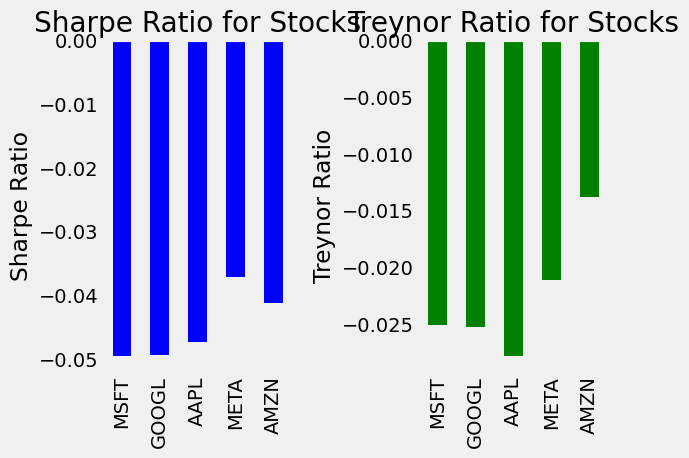

In [142]:
# Plot Sharpe Ratio
plt.subplot(1, 2, 1)
sharpe_ratio.plot(kind='bar', color='blue')
plt.title('Sharpe Ratio for Stocks')
plt.ylabel('Sharpe Ratio')
plt.grid()

# Plot Treynor Ratio
plt.subplot(1, 2, 2)
treynor_ratio.plot(kind='bar', color='green')
plt.title('Treynor Ratio for Stocks')
plt.ylabel('Treynor Ratio')
plt.grid()

# Adjust the space between the subplots
plt.subplots_adjust(wspace=1.0)

plt.tight_layout()
plt.show()

In [143]:
def calculate_liquidity_metrics(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    historical_data = stock.history(start=start_date, end=end_date)
    bid_ask_spread = historical_data["Open"] - historical_data["Close"]
    trading_volume = historical_data["Volume"]
    return bid_ask_spread, trading_volume

def plot_liquidity_metrics(bid_ask_spread, trading_volume):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    ax1.plot(bid_ask_spread.index, bid_ask_spread.values, color='blue', label='Bid-Ask Spread')
    ax1.set_ylabel('Bid-Ask Spread')
    ax1.legend()

    ax2.plot(trading_volume.index, trading_volume.values, color='green', label='Trading Volume')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Trading Volume')
    ax2.legend()

    plt.tight_layout()
    plt.show()

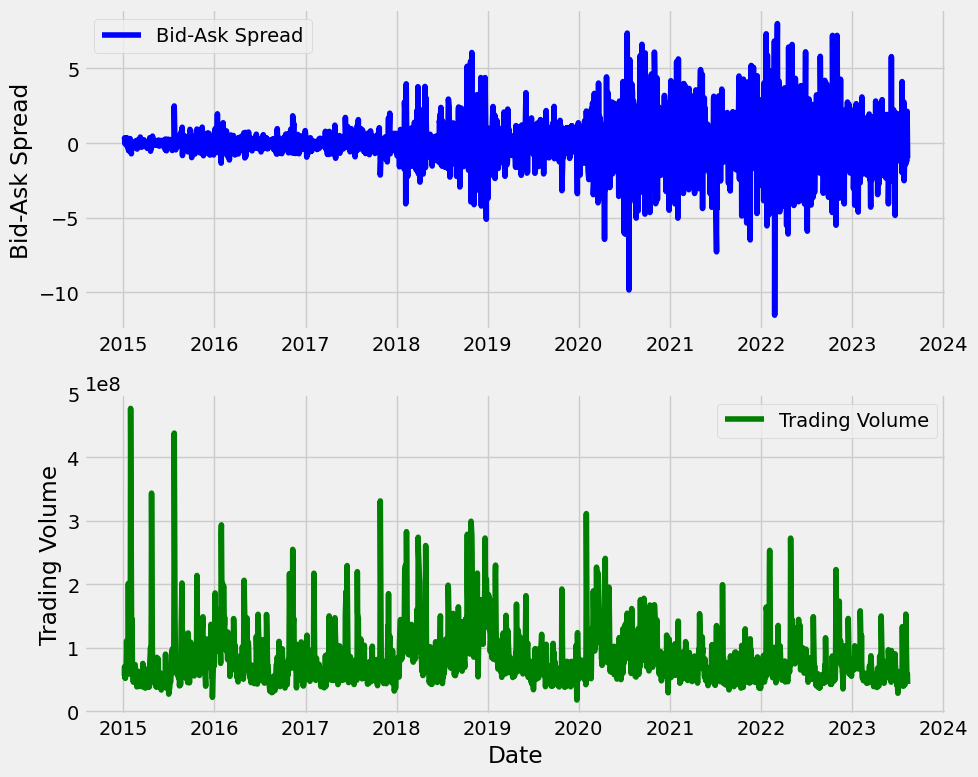

In [144]:
bid_ask_spread, trading_volume = calculate_liquidity_metrics(symbol, start_date, end_date)
plot_liquidity_metrics(bid_ask_spread, trading_volume)

### Portfolio Analysis

In [145]:
weights = [0.2, 0.2, 0.2, 0.2, 0.2]  # Weighted allocation for Microsoft, Google, and Apple

In [152]:
stock_data = pd.DataFrame()
for symbol in symbols:
    stock = yf.Ticker(symbol)
    historical_data = stock.history(start=start_date, end=end_date)
    stock_data[symbol] = historical_data["Close"]

In [155]:
def calculate_portfolio_return(weights, stock_data):
    returns = stock_data.pct_change()
    portfolio_return = np.dot(returns, weights)
    return portfolio_return

def plot_portfolio_trendline(portfolio_return):
    portfolio_series = pd.Series(portfolio_return, index=stock_data.index)  # Convert to Pandas Series with correct index
    plt.figure(figsize=(10, 5))
    plt.plot(portfolio_series.index, portfolio_series.values, marker='o', linestyle='-', label='Portfolio')
    plt.title("Portfolio Pricing")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Return")
    
# Add trendline
    trendline = np.polyfit(np.arange(len(portfolio_series)), portfolio_series, 1)
    plt.plot(portfolio_series.index, np.polyval(trendline, np.arange(len(portfolio_series))), color='red', label='Trendline')
    
    plt.legend()
    plt.grid()
    plt.show()

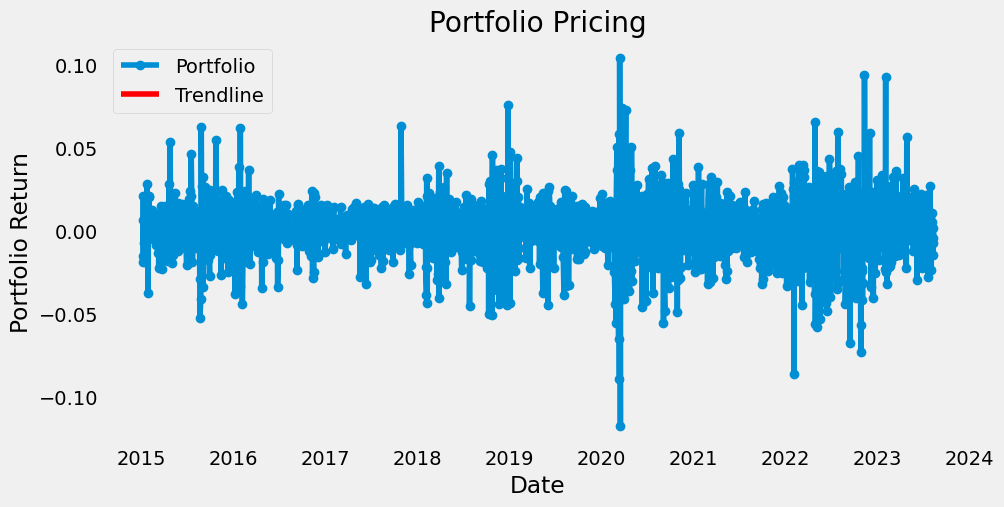

In [156]:
portfolio_return = calculate_portfolio_return(weights, stock_data)
plot_portfolio_trendline(portfolio_return)

In [160]:
portfolio_return = calculate_portfolio_return(weights, stock_data)
    
portfolio_return_series = pd.Series(portfolio_return, index=stock_data.index)
last_five_days_return = portfolio_return_series[-5:]  # Select the last five days of returns
    
for date, ret in zip(last_five_days_return.index, last_five_days_return):
    print(f"Date: {date.date()}, Portfolio Return: {ret:.4f}")

Date: 2023-08-07, Portfolio Return: 0.0109
Date: 2023-08-08, Portfolio Return: -0.0073
Date: 2023-08-09, Portfolio Return: -0.0145
Date: 2023-08-10, Portfolio Return: 0.0016
Date: 2023-08-11, Portfolio Return: -0.0042


### Portfolio Risk

In [176]:
def calculate_portfolio_return(weights, stock_data):
    returns = stock_data.pct_change()
    portfolio_return = np.dot(returns, weights)
    return portfolio_return

In [177]:
def calculate_portfolio_std_dev(weights, stock_data):
    returns = stock_data.pct_change()
    portfolio_return = calculate_portfolio_return(weights, stock_data)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    return portfolio_std_dev

In [178]:
def calculate_portfolio_beta(weights, stock_data, market_data):
    portfolio_return = calculate_portfolio_return(weights, stock_data)
    market_return = market_data.pct_change()
    covariance_matrix = np.cov(portfolio_return, market_return)
    portfolio_beta = covariance_matrix[0, 1] / covariance_matrix[1, 1]
    return portfolio_beta

In [190]:
def calculate_portfolio_var(weights, stock_data, confidence_level=0.95):
    portfolio_return = calculate_portfolio_return(weights, stock_data)
    portfolio_std_dev = calculate_portfolio_std_dev(weights, stock_data)
    z_score = np.abs(np.percentile(portfolio_return, (1 - confidence_level) * 100))
    portfolio_var = portfolio_std_dev * z_score
    return portfolio_var

In [191]:
#Market data (S&P 500 index as an example)
market_ticker = "^GSPC"
market_data = yf.download(market_ticker, start=start_date, end=end_date)["Close"]

[*********************100%***********************]  1 of 1 completed


In [192]:
portfolio_return = calculate_portfolio_return(weights, stock_data)
portfolio_std_dev = calculate_portfolio_std_dev(weights, stock_data)
portfolio_beta = calculate_portfolio_beta(weights, stock_data, market_data)
portfolio_var = calculate_portfolio_var(weights, stock_data)

AttributeError: 'list' object has no attribute 'T'